# Progressive Dinner Party Mathematical Program

# Setup

### AMPL

In [1]:
!pip install -q amplpy

In [2]:
# Google Colab & Kaggle integration
MODULES=['ampl', 'gokestrel']
from amplpy import tools
ampl = tools.ampl_notebook(modules=MODULES, globals_=globals()) # instantiate AMPL object and register magics

AMPL License:


### Imports

In [3]:
from getpass import getpass
import itertools
import pickle
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Model

In [4]:
%%writefile pdp.mod
problem progressive_dinner_party;
#--------------------------------

set N;
param C{N,N};
var s{N} binary;
var m{N} binary;
var d{N} binary;
var e{N,N} binary;

minimize objective:
	sum {i in N, j in N} C[i,j]*e[i,j];

subject to classes {i in N}:
	s[i] + m[i] + d[i] = 1;
	
subject to inflow_s {i in N}:
	sum {j in N} s[i] * e[j,i] = 0;
	
subject to outflow_s {i in N}:
	sum {j in N} s[i] * e[i,j] = 3 * s[i];
	
subject to inflow_m {i in N}:
	sum {j in N} m[i] * e[j,i] = 3 * m[i];
	
subject to outflow_m {i in N}:
	sum {j in N} m[i] * e[i,j] = 3 * m[i];
	
subject to inflow_d {i in N}:
	sum {j in N} d[i] * e[j,i] = 3 * d[i];
	
subject to outflow_d {i in N}:
	sum {j in N} d[i] * e[i,j] = 0;
	
subject to shortcut {i in N, j in N}:
	s[i] * e[i,j] + d[j] <= 1;
	
subject to equipartition:
	3 * sum {i in N} m[i] = card(N);

Writing pdp.mod


# Data

In [5]:
w_size = widgets.IntText(description='Size', orientation='horizontal')
w_cluster = widgets.IntText(description='Clusters', orientation='horizontal')
w_deviation = widgets.FloatText(description='Deviation', orientation='horizontal')
w_scale = widgets.IntText(description='Scaling', orientation='horizontal')
display(widgets.Box([w_size, w_cluster,w_deviation, w_scale], layout=widgets.Layout(display='flex', flex_flow='row')))

Box(children=(IntText(value=0, description='Size'), IntText(value=0, description='Clusters'), FloatText(value=…

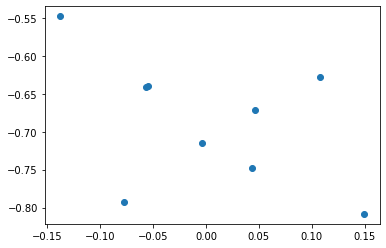

In [6]:
rng = np.random.default_rng()

N = w_size.value
K = w_cluster.value
σ = w_deviation.value
λ = w_scale.value

assert N >= 9
assert K > 0
assert N % K == 0
assert N % 3 == 0
assert σ >= 0
assert λ > 0

points = {}
centers = rng.uniform(-1, 1, (K, 2))
for i in range(K):
	points[str(centers[i])] = λ * rng.normal(centers[i], σ, (N // K, 2))

X = np.array(list(points.values())).reshape(N, 2)[:,0]
Y = np.array(list(points.values())).reshape(N, 2)[:,1]

G = nx.Graph()
for i in range(N):
	G.add_node(i, x = X[i], y = Y[i])

C = np.empty((N,N))
for a,b in itertools.product(range(N), range(N)):
	dX = (X[b]-X[a]) * (X[b]-X[a])
	dY = (Y[b]-Y[a]) * (Y[b]-Y[a])
	C[a,b] = np.sqrt(dX + dY)

with open('pdp.dat', 'w') as f:
	f.write('set N :=')
	for n in range(1, N + 1):
		f.write(f' {n}')
	f.write(';\n')
	f.write('param C :=\n')
	for i,j in itertools.product(range(N), range(N)):
		f.write(f'{i+1} {j+1} {C[i,j]}\n')
	f.write(';')

plt.scatter(X,Y)
plt.show()

In [7]:
with open('pdp.run', 'w') as f:
  f.write("option solver kestrel;\n")
  f.write("option kestrel_options 'solver=octeract';\n")
  f.write(f"option email '{getpass('NEOS MAIL')}';\n")
  f.write("model pdp.mod;\n")
  f.write("data pdp.dat;\n")
  f.write("solve;")

NEOS MAIL··········


In [8]:
%%ampl_eval
commands pdp.run;

Connecting to: neos-server.org:3333
Job 12548802 submitted to NEOS, password='yTYtRVCv'
Check the following URL for progress report:
https://neos-server.org/neos/cgi-bin/nph-neos-solver.cgi?admin=results&jobnumber=12548802&pass=yTYtRVCv
Job 12548802 dispatched
password: yTYtRVCv
---------- Begin Solver Output -----------
Condor submit: 'neos.submit'
Condor submit: 'watchdog.submit'
Job submitted to NEOS HTCondor pool.
kestrel_options:solver=octeract

You are using the solver octeract.
Executing on prod-exec-1.neos-server.org
 Octeract Engine v4.4.0
 Copyright (c) Octeract Ltd, 2022
 1-core licence
 Licensee: Elizabeth Wong (elwong@wisc.edu)
 Licence expiry date: Jul 11 2024

[ 0.0s ] Command executed: /opt/octeract/bin/octeract-engine kestrel.nl -AMPL 
[ 0.0s ] Start time: Tue Dec 20 07:36:38 2022
[ 0.0s ] Hostname: prod-exec-1.neos-server.org | Available threads: 64 | Available RAM: 202GB
[ 0.0s ] Reading model file: kestrel.nl
[ 0.0s ] Model checksum: 7B2201D4F62AB69A1817D193877B8069